In [11]:
# Library check
import tensorflow as tf
print("Tensorflow: " , tf.__version__)
import keras
print("Keras : ", keras.__version__)

import pandas as pd
print("Pandas: ", pd.__version__)
import matplotlib
print("Matplotlib: ", matplotlib.__version__)
import seaborn as sns
print("Seaborn: ", sns.__version__)
import numpy as np
print("Numpy: ", np.__version__)

Tensorflow:  1.13.1
Keras :  2.2.4
Pandas:  0.24.2
Matplotlib:  3.0.3
Seaborn:  0.9.0
Numpy:  1.16.2


## Basic setup Neuronal Network in Keras

#### The Input Data

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

# just for illustration of the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### The layers

In [5]:
# Input-Layer
from keras.layers import Input
inputs = Input(shape=(4,)) # 
print(inputs)

# Shape, not including the batch size. 
# For instance, shape=c(32) indicates that the expected input will be batches of 32-dimensional vectors.

Tensor("input_2:0", shape=(?, 4), dtype=float32)


In [7]:
# Hidden layer
# Since added layer is neither input nor output layer, its a so called Hidden layer
# Dense or Fully Connected(fc) indicates that all Neurons of respective layer are independant from each other

from keras.layers import Dense
fc = Dense(3)(inputs) # creates hidden layer with 3 Neurons
print(fc)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) 
# where activation is the element-wise activation function passed as the activation argument,
# kernel is a weights matrix created by the layer,
# and bias is a bias vector created by the layer (only applicable if use_bias is True).

Tensor("dense_3/BiasAdd:0", shape=(?, 3), dtype=float32)


#### Plug these two layers into the Keras Model

In [8]:
from keras.models import Model
model = Model(input = inputs, output = fc)
model.summary()

# Input layer takes 4 Features as input
# Hidden layer has 3 Neurons and 15 parameters two train: 3 * (4 weights + 1bias)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


C:\Users\The Woops\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [12]:
# Before Prediction Keras Model has to be compiled to TensorFlow
# Compile takes parameters for the optimization alogorithm, the loss function and metrix to show the loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Simple Prediction for the first row in iris dataset

In [13]:
model.predict(np.array([[ 5.1, 3.5, 1.4, 0.2]])) 

array([[-4.5604   ,  2.1433332, -2.8028533]], dtype=float32)

In [23]:
# Problem: What the hell do these numbers mean?
# -> we want to know the flower category! 
# Solution: Apply the softmax activation function which transforms these numbers in interpretable probabilites

inputs = Input(shape=(4, ))
fc = Dense(3)(inputs) # Hidden layer mit 3 Neuronen, Input von inputs layer bekommen
predictions = Dense(3, activation='softmax')(fc) # Neue Layer it 3 Neuronen+Aktivierungsfunktion, Input von fc-layer
model = Model(input=inputs, output=predictions)

model.predict(np.array([[ 5.1, 3.5, 1.4, 0.2]]))
# → Klasse 1 wird am wahrscheinlichsten angesehen

C:\Users\The Woops\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


array([[0.6584893 , 0.01204652, 0.3294642 ]], dtype=float32)

## Application Keras-Model on whole dataset

#### Preparations:

In [80]:
# We want to train the model with the whole iris dataset.
# After training we want to evaluate model performance with the measures Accurarcy and Loss

# How does the target y in the iris dateset look like?
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

print("3 Different target Classes encoded as:" ,  df.target.unique())
df.head()

3 Different target Classes encoded as: [0. 1. 2.]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [81]:
from random import *
# One Hot Encoding of target, otherwise measures dont work
y = np.array(iris.target)

from keras.utils.np_utils import to_categorical
num_categories = 3
y = to_categorical(y, num_categories)

print(y[randint(0, len(y))])
print(y[randint(0, len(y))])
print(y[randint(0, len(y))])

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


In [82]:
# Creation Train and Test Split (80/20)
from sklearn.model_selection import train_test_split

X = np.array(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# random_state: make result replicable
# stratify: actives stratified sampling - same class distribution within train and test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

#### Same model as above

In [83]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs) # Hidden layer mit 3 Neuronen, Input von inputs layer bekommen
predictions = Dense(3, activation='softmax')(fc) # Neue Layer it 3 Neuronen+Aktivierungsfunktion, Input von fc-layer
model = Model(input=inputs, output=predictions)

# Translation into Tensorflow
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\The Woops\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


### Training history visualization
https://keras.io/visualization/

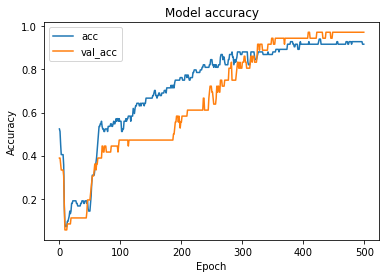

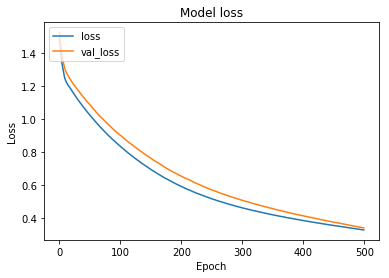

In [84]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
                # Cross validation against Over-/Underfitting and to evaulate training process durin execution
                # Capture validation error val_err and validation accuracy val_acc
                # verbose: dont show measures spam
        

#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()


#### Evaluation

<b>Model accuracy:</b>    slight Overfitting because val_acc is better than Acc, but okay <br>
<b>Model_loss: </b>        Model is constantly improving in training and testing, no overfitting , great dataset^^